In [2]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=63ccd21eb129667f523448f241253c3a1379b1df28531b0c67cb09ccbf1aa12e
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [4]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [5]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)



In [6]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>



In [7]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])



In [8]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
from qiskit import transpile
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()



Measurement Results: {'01': 1024}
     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0 


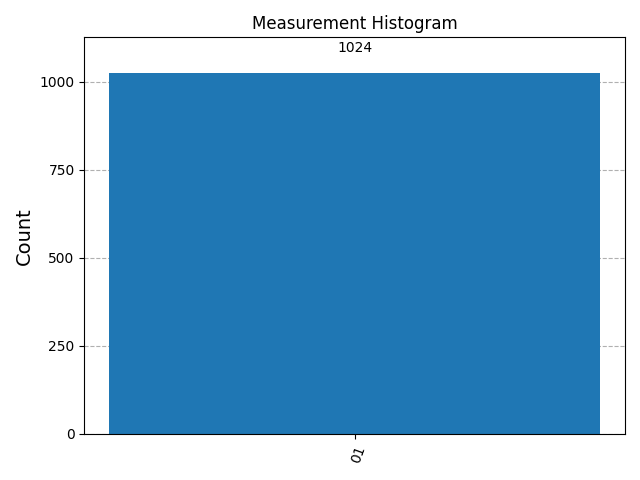

In [10]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
print(qc.draw('text'))
# Plot histogram (using save and display)
hist = plot_histogram(counts, title="Measurement Histogram")
hist.savefig("histogram_output.png")
from IPython.display import Image
display(Image("histogram_output.png"))

Measurement Results: {'01': 483, '10': 511, '00': 488, '11': 518}

Quantum Circuit:
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


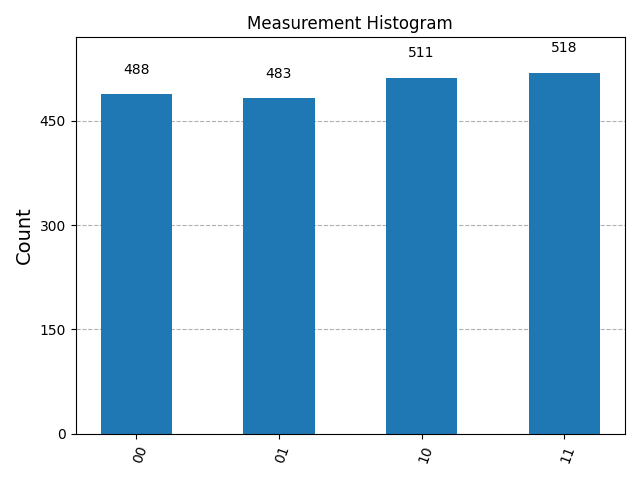

In [11]:
qc = QuantumCircuit(2,2)

# Apply Hadamard gate on both qubits
qc.h([0, 1])

qc.measure([0, 1], [0, 1])
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2000)
result = job.result()
counts = result.get_counts()

# Display Results
print("Measurement Results:", counts)
print("\nQuantum Circuit:")
print(qc.draw('text'))

# Plot histogram
hist = plot_histogram(counts, title="Measurement Histogram")
hist.savefig("histogram_output.png")
from IPython.display import Image
display(Image("histogram_output.png"))

Measurement Results: {'10': 2000}

Quantum Circuit:
          ┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


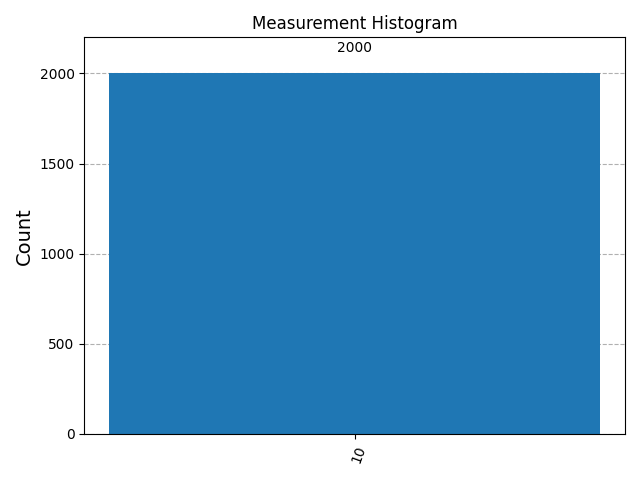

In [12]:
qc = QuantumCircuit(2,2)

# Apply X gate on the second qubit instead of the first
qc.x(1)

qc.measure([0, 1], [0, 1])
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2000)
result = job.result()
counts = result.get_counts()

# Display Results
print("Measurement Results:", counts)
print("\nQuantum Circuit:")
print(qc.draw('text'))

# Plot histogram
hist = plot_histogram(counts, title="Measurement Histogram")
hist.savefig("histogram_output.png")
from IPython.display import Image
display(Image("histogram_output.png"))

Measurement Results: {'00': 953, '11': 1047}

Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


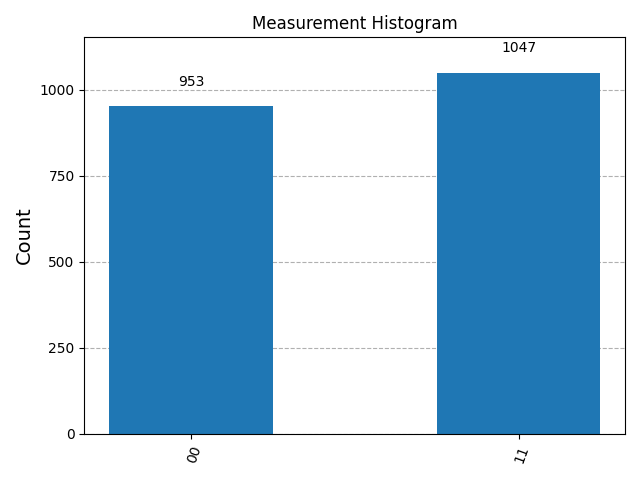

In [13]:
qc = QuantumCircuit(2,2)

# Apply Hadamard and then CNOT gate
qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2000)
result = job.result()
counts = result.get_counts()

# Display Results
print("Measurement Results:", counts)
print("\nQuantum Circuit:")
print(qc.draw('text'))

# Plot histogram
hist = plot_histogram(counts, title="Measurement Histogram")
hist.savefig("histogram_output.png")
from IPython.display import Image
display(Image("histogram_output.png"))

Measurement Results: {'00': 1986, '11': 2110}

Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


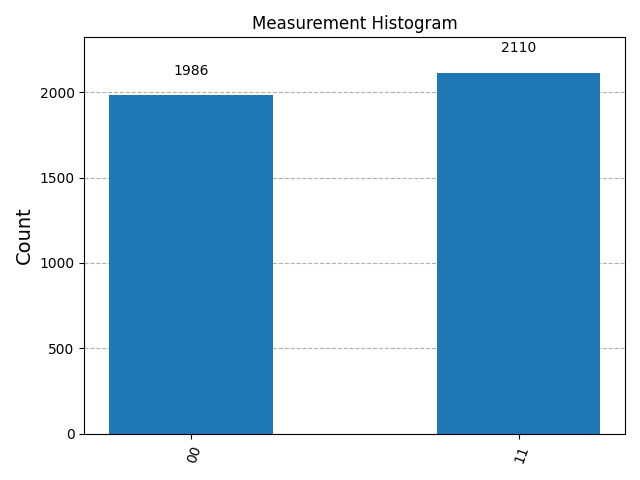

In [14]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# number of shots from 1024 to 4096
job = simulator.run(compiled_circuit, shots=4096)

result = job.result()
counts = result.get_counts()

# Display Results
print("Measurement Results:", counts)
print("\nQuantum Circuit:")
print(qc.draw('text'))

# Plot histogram
hist = plot_histogram(counts, title="Measurement Histogram")
hist.savefig("histogram_output.png")
from IPython.display import Image
display(Image("histogram_output.png"))

Measurement Results: {'01': 506, '11': 500, '00': 513, '10': 481}

Quantum Circuit:
     ┌───┐┌─┐   ┌─┐   
q_0: ┤ H ├┤M├───┤M├───
     ├───┤└╥┘┌─┐└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├─╫─┤M├
     └───┘ ║ └╥┘ ║ └╥┘
c: 2/══════╩══╩══╩══╩═
           0  1  0  1 


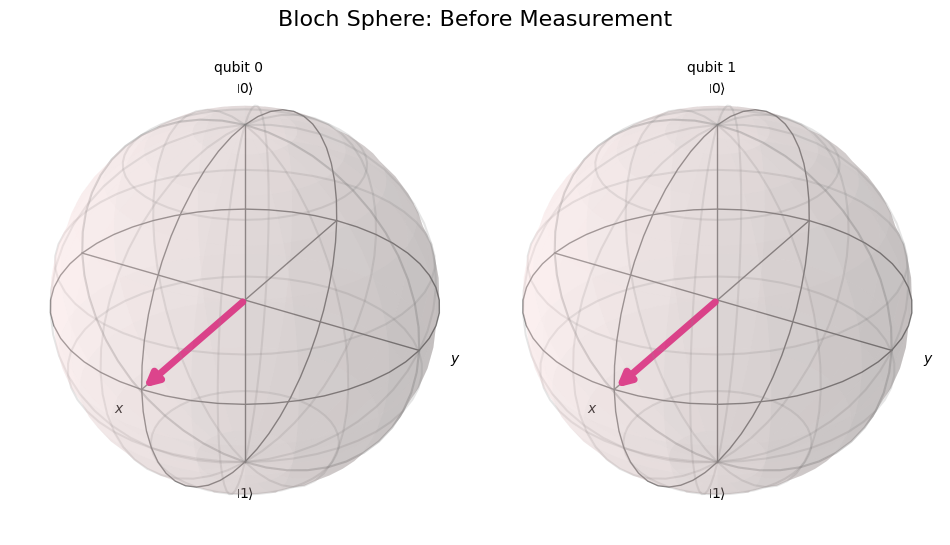

In [15]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Create and prepare the circuit
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Apply Hadamard gates
qc.measure([0, 1], [0, 1])

# Get statevector before measurement
qc_state = QuantumCircuit(2)
qc_state.h([0, 1])
state = Statevector.from_instruction(qc_state)

qc.measure([0, 1], [0, 1])
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2000)
result = job.result()
counts = result.get_counts()

# Display Results
print("Measurement Results:", counts)
print("\nQuantum Circuit:")
print(qc.draw('text'))

# Visualize combined state on Bloch sphere
plot_bloch_multivector(state, title="Bloch Sphere: Before Measurement")
